# How to train a model and save it 

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
df = sns.load_dataset('titanic')
df.head()

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import  StandardScaler
X = df[['age','fare']]
X.age.fillna(value=X['age'].mean(),inplace=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = KMeans(n_clusters=5)
model.fit(X_scaled)
df['cluster'] = model.labels_

C:\Users\HP\AppData\Local\Temp\ipykernel_2132\2318412836.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X.age.fillna(value=X['age'].mean(),inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_2132\2318412836.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.age.fillna(value=X['age'].mean(),inplace=True)


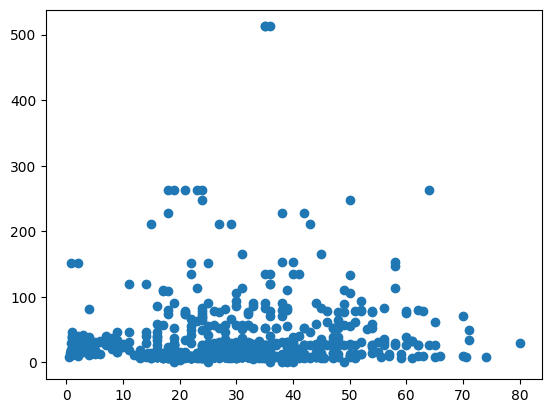

In [4]:
plt.scatter(x=df['age'],y=df['fare'])
plt.show()

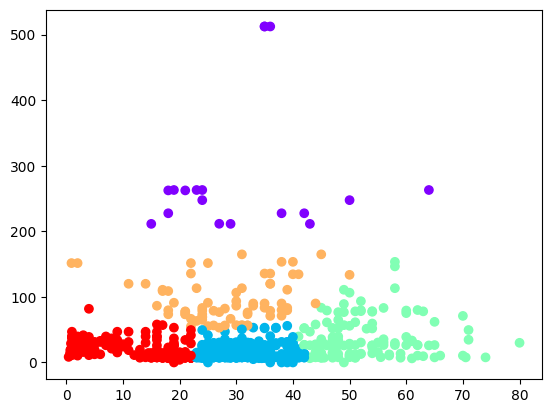

In [5]:
plt.scatter(x=df['age'],y=df['fare'],c=df['cluster'],cmap='rainbow')
plt.show()

In [45]:
fig = px.scatter(df,x='age',y='fare',color='cluster')
fig.show()

In [46]:
fig = px.scatter_3d(df,x='age',y='fare',z='pclass',color='cluster')
fig.show()

In [47]:
fig = px.parallel_coordinates(df, title='titanic density',color='cluster')
fig.show()

# in order to save a model  we've to install these libraries Joblib and pickle 

In [48]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable




[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [49]:
pip install pickle 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for pickle


In [50]:
# in order to save the model we've to write this  command 
import joblib
joblib.dump (model,'KMeansClustering.joblib')

['KMeansClustering.joblib']

In [51]:
# load the model 
loaded_model = joblib.load('KMeansClustering.joblib')

# Same thing we'll apply on Descision TreeClassifier

In [119]:
import seaborn as sns 
df_1 = sns.load_dataset('tips') 
df_1
# in this we'll predict that in male or female which one give more tips 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [120]:
# df_1 = pd.get_dummies(df_1,columns= ['smoker'])

# df_1 = pd.get_dummies(df_1,columns= ['day'])

# df_1 = pd.get_dummies(df_1,columns= ['time'])
# we can also do transform data by using label encoder in scikit learn 


In [121]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_1['smoker'] = le.fit_transform(df_1['smoker'])
df_1['day'] = le.fit_transform(df_1['day'])
df_1['time'] = le.fit_transform(df_1['time'])

In [122]:
df_1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,2,0,2
1,10.34,1.66,Male,0,2,0,3
2,21.01,3.50,Male,0,2,0,3
3,23.68,3.31,Male,0,2,0,2
4,24.59,3.61,Female,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,0,1,0,3
240,27.18,2.00,Female,1,1,0,2
241,22.67,2.00,Male,1,1,0,2
242,17.82,1.75,Male,0,1,0,2


In [123]:
df_1.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [124]:
X = df_1.drop(columns=['sex'])
y = df_1['sex']


In [125]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   smoker      244 non-null    int64  
 3   day         244 non-null    int64  
 4   time        244 non-null    int64  
 5   size        244 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 11.6 KB


In [126]:
X.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,0,2,0,2
1,10.34,1.66,0,2,0,3
2,21.01,3.50,0,2,0,3
3,23.68,3.31,0,2,0,2
4,24.59,3.61,0,2,0,4


In [127]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(X,y)


In [128]:
# save the model 
joblib.dump(model,'descision_wala.joblib')
# this step we do we've more data and don't have capacity for training

['descision_wala.joblib']

In [129]:
import pickle
# saving the model 

with open('model.pkl','wb') as f:
    pickle.dump(model,f)
# wb = write binary and rb = read binary
# load the model 

with open('model.pkl','rb') as f:
    loaded_model = pickle.load(f)